venvにpip install torchvisionした。

### 2.1.1 Obtaining a pretrained network for image recognition

In [1]:
from torchvision import models

- The capitalized names refer to Python classes that implement a number of popular models.
- The lowercase names are convenience functions that return models instantiated from those classes, sometimes with different parameter sets.
- For instance, `resnet101` returns an instance of `ResNet` with 101 layers, `resnet18` has 18 layers.

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

### 2.1.2 AlexNet

In [3]:
alexnet = models.AlexNet()

- 今the network is uninitialized: its weights have not been trained on anything - the network itself is a blank (or rather, *random*) slate.
- We'd need to either train it from scratch or load weights from prior training.

### 2.1.3 ResNet

In [2]:
resnet = models.resnet101(pretrained=True)

### 2.1.4 Ready, set, almost run

In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

- `torchvision` module provides `transforms`, which allow us to quickly define **pipelines of basic preprocessing** functions.

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

- scale the input image to `256x256`, crop the image to `224x224` around the center, transform it to a tensor, and normalize its RGB components so that they have defined means and standard deviations.
- **These need to match what was presented to the network during training, if we want the network to produce meaningful answers**.

In [4]:
from PIL import Image
img = Image.open("../data/p1ch2/bobby.jpg")

- dlwpt-codeのdataフォルダをcopyしてきた。

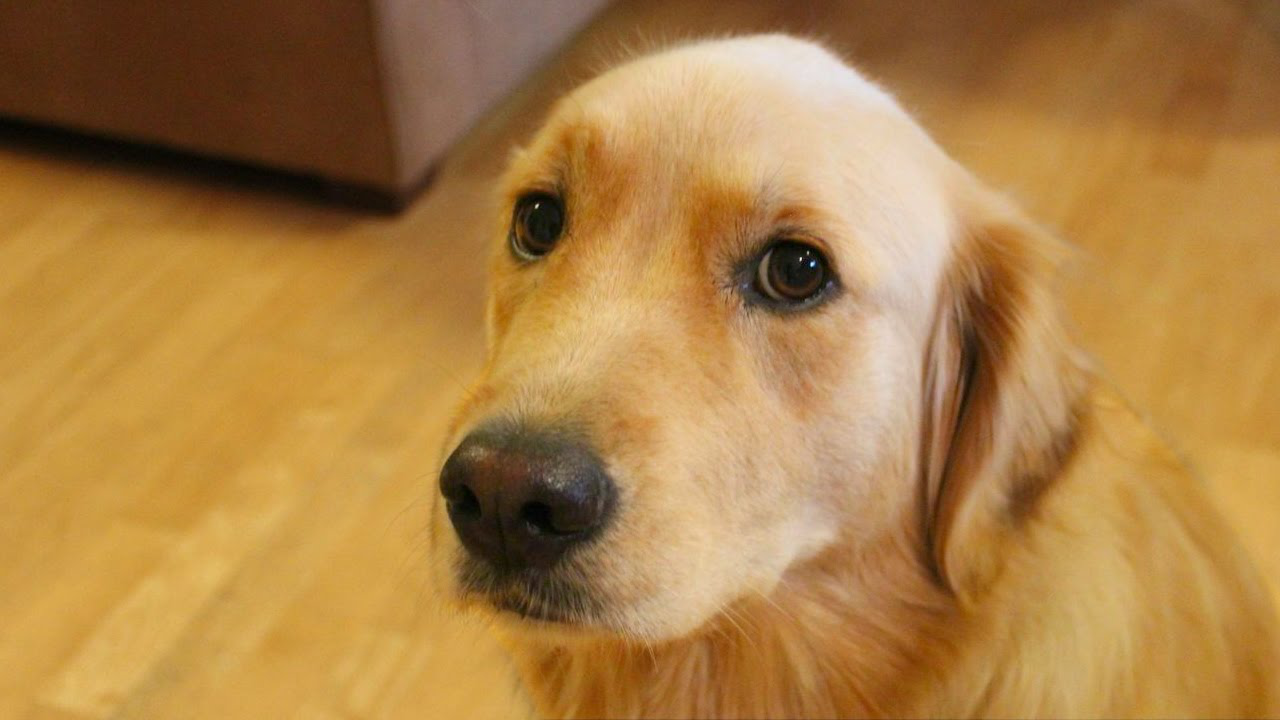

In [8]:
img

In [8]:
img_t = preprocess(img)

In [9]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

### 2.1.5 Run!

- **In order to do inference, we need to put the network in `eval` mode**:

In [14]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

- **If we forget to do that, some pretrained models, like *batch normalization* and *dropout*, will not produce meaningful answers, just because of the way they work internally**. 
- dropoutの学習や推論での動作が違うのは覚えている。確かに推論時dropout rateをかけないといけないらしい。batch normalizationは、名前の通りだ、推論時batch normalizationやるかどうか覚えていない。少なくとも、今写真一枚しかないので、batch normalizationをやるのは違和感がある。

In [13]:
out = resnet(batch_t)

In [14]:
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5182e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

- load a text file listing the labels in the same order they were presented to the network **during training**.

In [18]:
with open('../data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

- determine the index corresponding to the maximum score in the `out` tensor.
- use `max` function which outputs the maximum value in a tensor as well as the indices where that maximum value occurred.

In [16]:
_, index = torch.max(out, 1)

- Here, **`index` is not a plain Python number, but a one-element, one-dimensional tensor (specifically, `tensor([207])`)**, so we need to get the actual numerical value to use as an index into `labels` list using `index[0]`.
- Also use `softmax` to normalize the outputs to the range `[0, 1]`, and divide by the sum.
    - That gives us something roughly akin to the confidence that the model has in its prediction.

In [17]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.29335021972656)

In [18]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29335021972656),
 ('Labrador retriever', 2.808121681213379),
 ('cocker spaniel, English cocker spaniel, cocker', 0.28267431259155273),
 ('redbone', 0.20863044261932373),
 ('tennis ball', 0.11621593683958054)]

- The 5th answer, "tennis ball", is probably because there are enough pictures of tennis balls with dogs nearby that the model is essentially saying, "There's a 0.1% chance that I've completely misunderstood what a tennis ball is."
- This is a great example of the fundamental differences in how humans and neural networks view the world, as well as **how easy it is for strange, subtle biases to sneak into our data**.
- How successful the network will be will largely depend on whether the subjects were well represented in the training set.

### judge dog

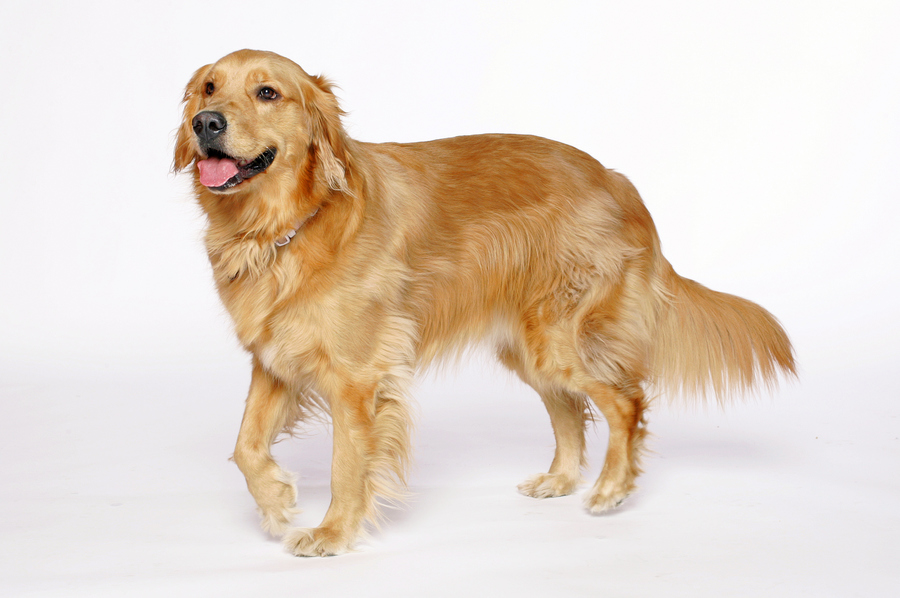

In [6]:
img_test = Image.open('../data/p1ch2/retrie_noun_002_31008.jpg')
img_test

In [15]:
img_test_t = preprocess(img_test)
batch_test_t = torch.unsqueeze(img_test_t, 0)
out_test = resnet(batch_test_t)

In [21]:
percentage = torch.nn.functional.softmax(out_test, dim=1)[0] * 100
_, indices = torch.sort(out_test, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 95.00270080566406),
 ('Sussex spaniel', 0.8651561737060547),
 ('cocker spaniel, English cocker spaniel, cocker', 0.45089730620384216),
 ('Irish setter, red setter', 0.4245338439941406),
 ('flat-coated retriever', 0.4132482707500458)]